<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/ACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto Correlation Function  (ACF) and Partial Auto Correlation Function (PACF)

### What is correlation?
* Correlation is a measure of the strength of the linear relationship between two variables. 
* Correlation goes between the values of 1 and -1 and the closer the correlation is to 1 the stronger the positive correlation. 
* The closer the correlation is to -1 the stronger the negative linear correlation.
* The closer the correlation is to 0, the weaker the linear correlation

An autocorrelation plot (a.k.a Correlogram) shows the correlation of the time series with itself lagged by *x* time units so the *y* axis is the correlation and the *x* axis is the number of time units of lag. 

The ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

The PACF only describes the direct relationship between an observation and its lag.  

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
import statsmodels.api as sm


In [0]:
from statsmodels.tsa.stattools import acovf, acf, acf, pacf, pacf_yw, pacf_ols

In [0]:
# import data
# Non-stationary

df1 = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)
df1.index.freq = 'MS' 

In [0]:
# Load Stationary data
df2 = pd.read_csv('DailyTotalFemaleBirths.csv', index_col = 'Date', parse_dates = True)

# daily frequency
df2.index.freq = 'D'

In [11]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [0]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Autocorrelation for 1D

In [15]:
# let's build a sample df
df = pd.DataFrame({'a':[13,5,11,12,9]})
df

,a
0,13
1,5
2,11
3,12
4,9


In [16]:
# calculate the acf for this df by passing it to acf()
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [18]:
# calculate pacf
pacf_yw(df['a'], nlags=4, method = 'mle') # mle = maximun likelihood estimation

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [0]:
from pandas.plotting import lag_plot

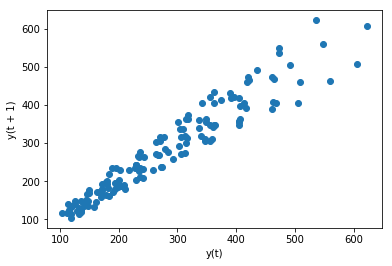

In [25]:
lag_plot(df1['Thousands of Passengers'])

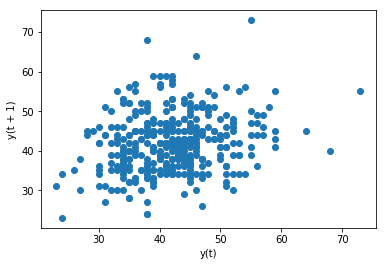

In [21]:
lag_plot(df2['Births'])

Lets use these lag_plots to build the entire ACF plots.

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

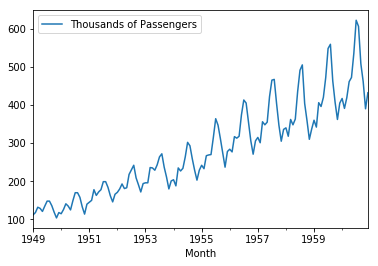

In [27]:
df1.plot()

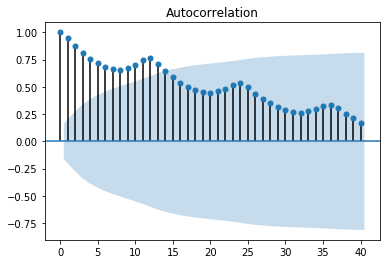

In [30]:
plot_acf(df1, lags = 40);

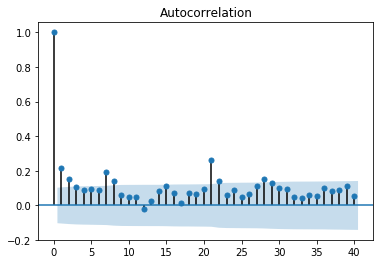

In [31]:
plot_acf(df2, lags = 40);

We can see the a clear difference between the stationary and non-stationary data.
The first graph shows the seasonality  inherent in a non-stationary data whereas the second graph is more 'flat'.

### Plotting the PACF

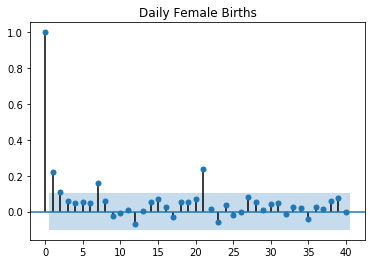

In [33]:
# plotting the partial ACF
plot_pacf(df2['Births'], lags = 40, title = 'Daily Female Births');